# K-means clustering

## import library

In [2041]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from matplotlib import cm

## load data

In [2042]:
fname_data = 'assignment_11_data.csv'

feature = np.genfromtxt(fname_data, delimiter=',')

x = feature[:,0]
y = feature[:,1]

number_data     = np.size(feature, 0)
number_feature  = np.size(feature, 1)

print('number of data : {}'.format(number_data))
print('number of feature : {}'.format(number_feature))

number of data : 1000
number of feature : 2


## plot the input data

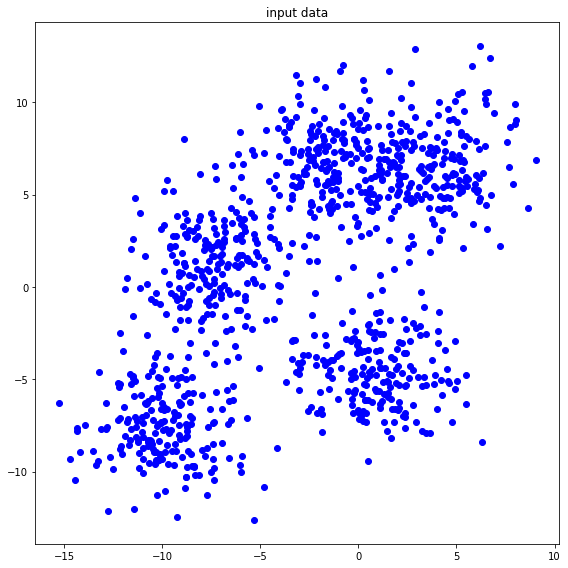

In [2043]:
plt.figure(figsize=(8,8))   
plt.title('input data')

plt.scatter(x, y, color='blue')

plt.tight_layout()
plt.show()

## compute distance
- feature : $n \times m$, center : $1 \times m$, distance : $n \times 1$
- $n$ : number of data, $m$ : number of features

In [2044]:
def compute_distance(feature, center):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # center = {x죄표의 center point, y좌표의 center point}
    # 각각의 거리 = n개의 data에 대한 거리(n * 1)

    distance = np.power(feature - center, 2).sum(axis=1)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return distance

## compute centroid
- feature : $n \times m$, label_feature : $n \times 1$, value_label : $1 \times 1$, centroid : $1 \times m$
- $n$ : number of data, $m$ : number of features

In [2045]:
def compute_centroid(feature, label_feature, label):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # label: 하나의 레이블 
    # 각 레이블에 해당하는 centroid 리턴해줌
    index_label     = (label_feature == label)

    if not np.any(index_label):
        centroid        = False

    else:
        feature_label   = feature[index_label, :]
        centroid        = np.mean(feature_label, axis=0)

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

    return centroid

## compute label
- distance : $n \times k$, label_feature : $n \times 1$
- $n$ : number of data, $k$ : number of clusters

In [2046]:
def compute_label(distance):

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # 각각의 distance(n*k)가 주어졌을 때 
    # d10 < d11 이면? label = 0
    # d20 > d21 이면? label = 1

    label_feature = np.argmin(distance, axis=1)
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    
    return label_feature


## the number of clusters $K = 2$

In [2047]:
number_cluster          = 2
number_iteration        = 1500     # you can modify this value
loss_iteration_02       = np.zeros(number_iteration)
centroid_iteration_02   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_02        = np.random.randint(0, number_cluster, size=(number_data))

In [2048]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
# k개수 만큼 클러스터로 구분
# k =2 이면? 0~1
# c0 = {클러스터0에 포함되어있는 점들..}
# c1 = {클러스터1에 포함되어있는 점들..}
# 뮤M = 각각의 클러스터 들에서 중심(centroied) {M0, M1, ...}
# objective fun 가 최소가 되도록 하는!

# 최적화 방법
# 1. initialise(랜덤)
# 2. compute centroid
# 3. compute distance 모든 centroid까지의 거리 구하기
# 4. assign label 가까운 것의 centorid를 label로 바꿈

# centorid가 구할 수 없는 경우는?(클러스터에 포인터가 없는 경우)
# -> 이전의 클러스터의 centorid 값으로 계산할 것
label_cluster   = np.arange(number_cluster)

distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))

N = len(label_cluster)

for i in range(number_iteration):

    for k in range(N):

        value           = label_cluster[k]
        centroid_pre    = centroid[k, :] 
        centroid_new    = compute_centroid(feature, label_feature_02, value)

        if not np.any(centroid_new):
            centroid[k, :] = centroid_pre # 작은거 그대로
            
        else:
            centroid[k, :] = centroid_new # 작은거 갱신
            
        distance[:, k] = compute_distance(feature, centroid[k, :])
        centroid_iteration_02[i, k, :] = centroid[k, :]

    index_label         = compute_label(distance)
    label_feature_02    = label_cluster[index_label]
    distance_min        = distance.min(axis=1)
    loss                = np.mean(distance_min) # 최소로 갱신
    loss_iteration_02[i]   = loss 

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 4$

In [2049]:
number_cluster          = 4
number_iteration        = 1000    # you can modify this value
loss_iteration_04       = np.zeros(number_iteration)
centroid_iteration_04   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_04        = np.random.randint(0, number_cluster, size=(number_data))

In [2050]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
label_cluster   = np.arange(number_cluster)

distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))

label_cluster       = np.arange(number_cluster)

distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))

N = len(label_cluster)

for i in range(number_iteration):

    for k in range(N):

        value           = label_cluster[k]
        centroid_pre    = centroid[k, :] 
        centroid_new    = compute_centroid(feature, label_feature_04, value)

        if not np.any(centroid_new):
            centroid[k, :] = centroid_pre # 작은거 그대로
            
        else:
            centroid[k, :] = centroid_new # 작은거 갱신
            
        distance[:, k] = compute_distance(feature, centroid[k, :])
        centroid_iteration_04[i, k, :] = centroid[k, :]

    index_label         = compute_label(distance)
    label_feature_04    = label_cluster[index_label]
    distance_min        = distance.min(axis=1)
    loss                = np.mean(distance_min) # 최소로 갱신
    loss_iteration_04[i]   = loss 

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 8$

In [2051]:
number_cluster          = 8
number_iteration        = 16     # you can modify this value
loss_iteration_08       = np.zeros(number_iteration)
centroid_iteration_08   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_08        = np.random.randint(0, number_cluster, size=(number_data))

In [2052]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#
label_cluster   = np.arange(number_cluster)

distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))

N = len(label_cluster)

for i in range(number_iteration):

    for k in range(N):

        value           = label_cluster[k]
        centroid_pre    = centroid[k, :] 
        centroid_new    = compute_centroid(feature, label_feature_08, value)

        if not np.any(centroid_new):
            centroid[k, :] = centroid_pre # 작은거 그대로
            
        else:
            centroid[k, :] = centroid_new # 작은거 갱신
            
        distance[:, k] = compute_distance(feature, centroid[k, :])
        centroid_iteration_08[i, k, :] = centroid[k, :]

    index_label         = compute_label(distance)
    label_feature_08    = label_cluster[index_label]
    distance_min        = distance.min(axis=1)
    loss                = np.mean(distance_min) # 최소로 갱신
    loss_iteration_08[i]   = loss 

#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

## the number of clusters $K = 16$

In [2053]:
number_cluster          = 16
number_iteration        = 300     # you can modify this value
loss_iteration_16       = np.zeros(number_iteration)
centroid_iteration_16   = np.zeros((number_iteration, number_cluster, number_feature))
label_feature_16        = np.random.randint(0, number_cluster, size=(number_data))

In [2054]:
# ++++++++++++++++++++++++++++++++++++++++++++++++++
# complete the blanks
#

label_cluster   = np.arange(number_cluster)

distance            = np.zeros(shape=(number_data, number_cluster))
centroid            = np.zeros(shape=(number_cluster, number_feature))

N = len(label_cluster)

for i in range(number_iteration):

    for k in range(N):

        value           = label_cluster[k]
        centroid_pre    = centroid[k, :] 
        centroid_new    = compute_centroid(feature, label_feature_16, value)

        if not np.any(centroid_new):
            centroid[k, :] = centroid_pre # 작은거 그대로
            
        else:
            centroid[k, :] = centroid_new # 작은거 갱신
            
        distance[:, k] = compute_distance(feature, centroid[k, :])
        centroid_iteration_16[i, k, :] = centroid[k, :]

    index_label         = compute_label(distance)
    label_feature_16    = label_cluster[index_label]
    distance_min        = distance.min(axis=1)
    loss                = np.mean(distance_min) # 최소로 갱신
    loss_iteration_16[i]   = loss 
#
# ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## functions for presenting the results

---

---

In [2055]:
def function_result_01():

    print("final loss (K=2) = {:13.10f}".format(loss_iteration_02[-1]))
    

In [2056]:
def function_result_02():

    print("final loss (K=4) = {:13.10f}".format(loss_iteration_04[-1]))
    

In [2057]:
def function_result_03():

    print("final loss (K=8) = {:13.10f}".format(loss_iteration_08[-1]))
    

In [2058]:
def function_result_04():

    print("final loss (K=16) = {:13.10f}".format(loss_iteration_16[-1]))
    

In [2059]:
def function_result_05():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=2)')

    plt.plot(loss_iteration_02, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [2060]:
def function_result_06():
    
    plt.figure(figsize=(8,6)) 
    plt.title('loss (K=4)')

    plt.plot(loss_iteration_04, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [2061]:
def function_result_07():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=8)')

    plt.plot(loss_iteration_08, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [2062]:
def function_result_08():
    
    plt.figure(figsize=(8,6))
    plt.title('loss (K=16)')

    plt.plot(loss_iteration_16, '-', color='red')
    plt.xlabel('iteration')
    plt.ylabel('loss')
    
    plt.tight_layout()
    plt.show()

In [2063]:
def function_result_09():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # 클러스터에 따라 다른 색으로 어떻게 움직이는지 표현하기
    # 안: 파랑, 밖: 빨강

    a = centroid_iteration_02.shape[1]
    
    for i in range(a):

        label = ('cluster={}'.format(i))

        if (centroid_iteration_02[-1, i, 0] > np.power(10, 7)) or (centroid_iteration_02[-1, i, 1] > np.power(10, 7)):
            pass

        else: # 색칠
            plt.plot(centroid_iteration_02[0, i, 0], centroid_iteration_02[0, i, 1], 'o', color='blue')
            plt.plot(centroid_iteration_02[:, i, 0], centroid_iteration_02[:, i, 1], '-', label=label)
            plt.plot(centroid_iteration_02[-1, i, 0], centroid_iteration_02[-1, i, 1], 's', color='red')

    plt.legend()

    for i in range(a):

        if (centroid_iteration_02[-1, i, 0] > np.power(10, 7)) or (centroid_iteration_02[-1, i, 1] > np.power(10, 7)):
            pass

        else: # 파랑(처음) -> 빨강(끝)
            plt.plot(centroid_iteration_02[0, i, 0], centroid_iteration_02[0, i, 1], 'o', color='blue', label='initial')
            plt.plot(centroid_iteration_02[-1, i, 0], centroid_iteration_02[-1, i, 1], 's', color='red', label='final')
            break

    plt.legend()
    plt.tight_layout()
    plt.show()


    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2064]:
def function_result_10():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    a = centroid_iteration_04.shape[1]
    
    for i in range(a):

        label = ('cluster={}'.format(i))

        if (centroid_iteration_04[-1, i, 0] > np.power(10, 7)) or (centroid_iteration_04[-1, i, 1] > np.power(10, 7)):
            pass

        else: # 색칠
            plt.plot(centroid_iteration_04[0, i, 0], centroid_iteration_04[0, i, 1], 'o', color='blue')
            plt.plot(centroid_iteration_04[:, i, 0], centroid_iteration_04[:, i, 1], '-', label=label)
            plt.plot(centroid_iteration_04[-1, i, 0], centroid_iteration_04[-1, i, 1], 's', color='red')

    plt.legend()

    for i in range(a):

        if (centroid_iteration_04[-1, i, 0] > np.power(10, 7)) or (centroid_iteration_04[-1, i, 1] > np.power(10, 7)):
            pass

        else: # 파랑(처음) -> 빨강(끝)
            plt.plot(centroid_iteration_04[0, i, 0], centroid_iteration_04[0, i, 1], 'o', color='blue', label='initial')
            plt.plot(centroid_iteration_04[-1, i, 0], centroid_iteration_04[-1, i, 1], 's', color='red', label='final')
            break

    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2065]:
def function_result_11():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    a = centroid_iteration_08.shape[1]
    
    for i in range(a):

        label = ('cluster={}'.format(i))

        if (centroid_iteration_08[-1, i, 0] > np.power(10, 7)) or (centroid_iteration_08[-1, i, 1] > np.power(10, 7)):
            pass

        else: # 색칠
            plt.plot(centroid_iteration_08[0, i, 0], centroid_iteration_08[0, i, 1], 'o', color='blue')
            plt.plot(centroid_iteration_08[:, i, 0], centroid_iteration_08[:, i, 1], '-', label=label)
            plt.plot(centroid_iteration_08[-1, i, 0], centroid_iteration_08[-1, i, 1], 's', color='red')

    plt.legend()

    for i in range(a):

        if (centroid_iteration_08[-1, i, 0] > np.power(10, 7)) or (centroid_iteration_08[-1, i, 1] > np.power(10, 7)):
            pass

        else: # 파랑(처음) -> 빨강(끝)
            plt.plot(centroid_iteration_08[0, i, 0], centroid_iteration_08[0, i, 1], 'o', color='blue', label='initial')
            plt.plot(centroid_iteration_08[-1, i, 0], centroid_iteration_08[-1, i, 1], 's', color='red', label='final')
            break

    plt.legend()
    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2066]:
def function_result_12():

    plt.figure(figsize=(8,8))
    plt.title('centroid (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    a = centroid_iteration_16.shape[1]
    
    for i in range(a):

        label = ('cluster={}'.format(i))

        if (centroid_iteration_16[-1, i, 0] > np.power(10, 7)) or (centroid_iteration_16[-1, i, 1] > np.power(10, 7)):
            pass

        else: # 색칠
            plt.plot(centroid_iteration_16[0, i, 0], centroid_iteration_16[0, i, 1], 'o', color='blue')
            plt.plot(centroid_iteration_16[:, i, 0], centroid_iteration_16[:, i, 1], '-', label=label)
            plt.plot(centroid_iteration_16[-1, i, 0], centroid_iteration_16[-1, i, 1], 's', color='red')

    plt.legend()

    for i in range(a):

        if (centroid_iteration_16[-1, i, 0] > np.power(10, 7)) or (centroid_iteration_16[-1, i, 1] > np.power(10, 7)):
            pass

        else: # 파랑(처음) -> 빨강(끝)
            plt.plot(centroid_iteration_16[0, i, 0], centroid_iteration_16[0, i, 1], 'o', color='blue', label='initial')
            plt.plot(centroid_iteration_16[-1, i, 0], centroid_iteration_16[-1, i, 1], 's', color='red', label='final')
            break

    plt.legend()
    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2067]:
def function_result_13():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=2)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    # 클러스터의 수에 따라 다른 색으로 점 표현하기

    number_cluster = 2
    
    cmaps = cm.get_cmap('jet', number_cluster)

    plt.scatter(feature[:,0], feature[:,1], c = label_feature_02, cmap=cmaps)
    plt.colorbar(ticks=range(number_cluster), label='cluster')
    
    plt.clim(-0.5, number_cluster - 0.5)

    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2068]:
def function_result_14():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=4)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #
    number_cluster = 4
    
    cmaps = cm.get_cmap('jet', number_cluster)

    plt.scatter(feature[:,0], feature[:,1], c = label_feature_04, cmap=cmaps)
    plt.colorbar(ticks=range(number_cluster), label='cluster')
    
    plt.clim(-0.5, number_cluster - 0.5)

    plt.tight_layout()
    plt.show()
    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2069]:
def function_result_15():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=8)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    number_cluster = 8
    
    cmaps = cm.get_cmap('jet', number_cluster)

    plt.scatter(feature[:,0], feature[:,1], c = label_feature_08, cmap=cmaps)
    plt.colorbar(ticks=range(number_cluster), label='cluster')
    
    plt.clim(-0.5, number_cluster - 0.5)

    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

In [2070]:
def function_result_16():

    plt.figure(figsize=(8,8))
    plt.title('cluster (K=16)')

    # ++++++++++++++++++++++++++++++++++++++++++++++++++
    # complete the blanks
    #

    number_cluster = 16
    
    cmaps = cm.get_cmap('jet', number_cluster)

    plt.scatter(feature[:,0], feature[:,1], c = label_feature_16, cmap=cmaps)
    plt.colorbar(ticks=range(number_cluster), label='cluster')
    
    plt.clim(-0.5, number_cluster - 0.5)

    plt.tight_layout()
    plt.show()

    #
    # ++++++++++++++++++++++++++++++++++++++++++++++++++

---

---

## results

---

---

**************************************************
## [RESULT 01]
**************************************************
final loss (K=2) = 31.1126288111
**************************************************
## [RESULT 02]
**************************************************
final loss (K=4) = 10.5831291650
**************************************************
## [RESULT 03]
**************************************************
final loss (K=8) =  5.7123300405
**************************************************
## [RESULT 04]
**************************************************
final loss (K=16) =  3.0667151692
**************************************************
## [RESULT 05]
**************************************************


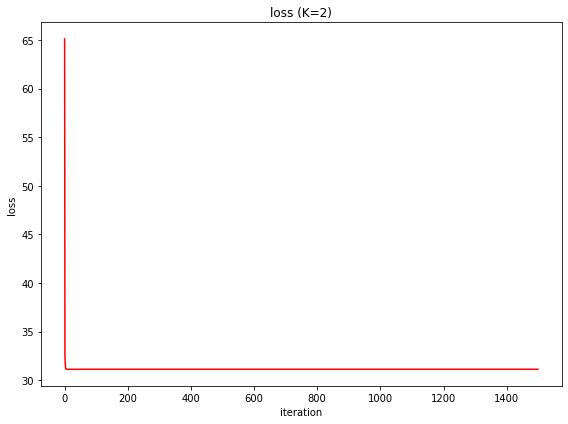

**************************************************
## [RESULT 06]
**************************************************


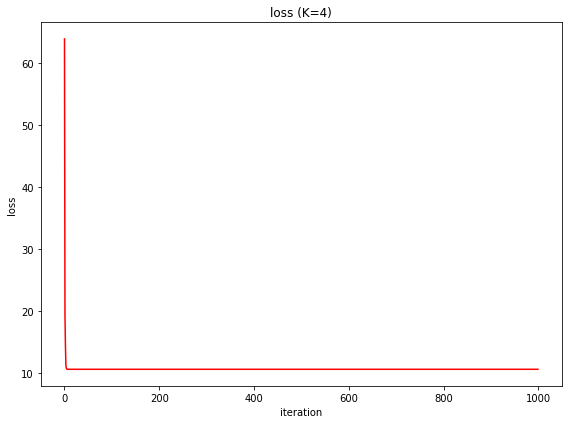

**************************************************
## [RESULT 07]
**************************************************


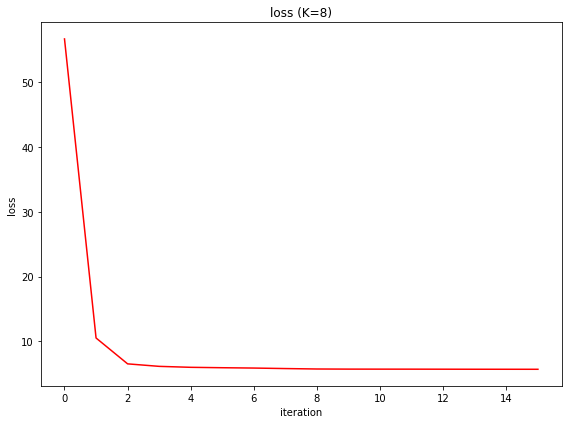

**************************************************
## [RESULT 08]
**************************************************


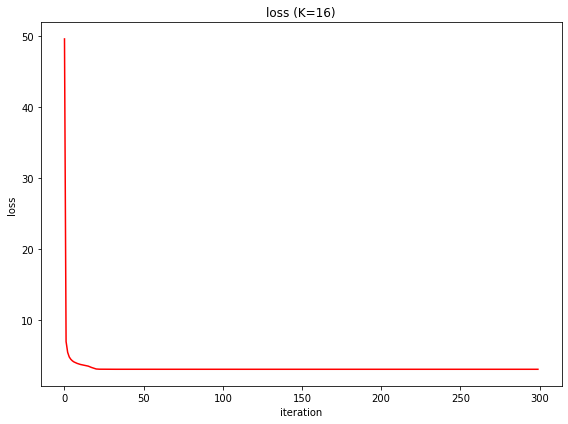

**************************************************
## [RESULT 09]
**************************************************


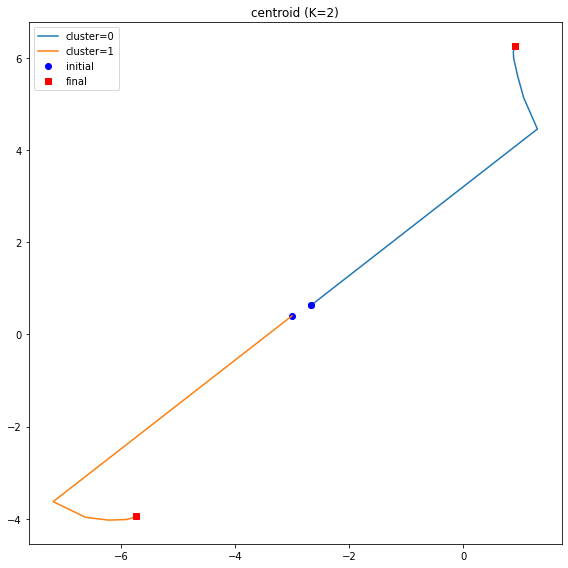

**************************************************
## [RESULT 10]
**************************************************


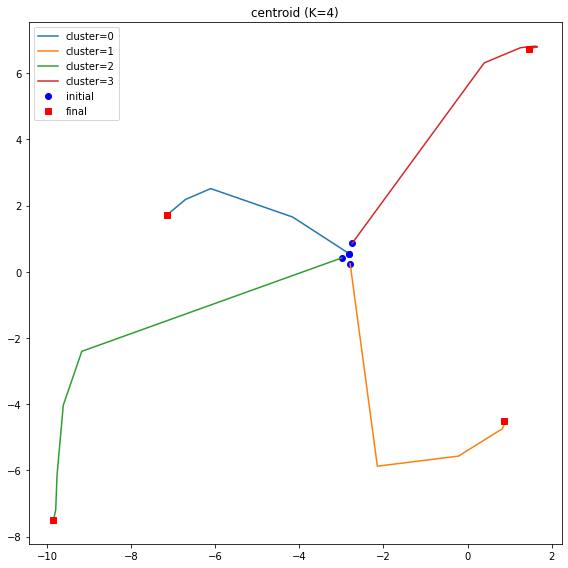

**************************************************
## [RESULT 11]
**************************************************


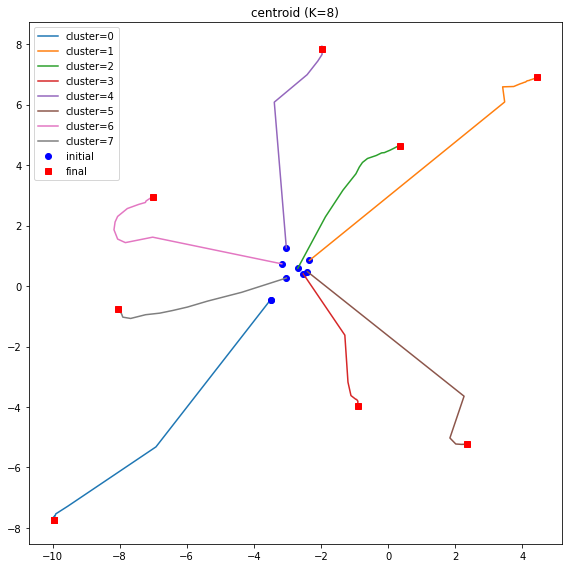

**************************************************
## [RESULT 12]
**************************************************


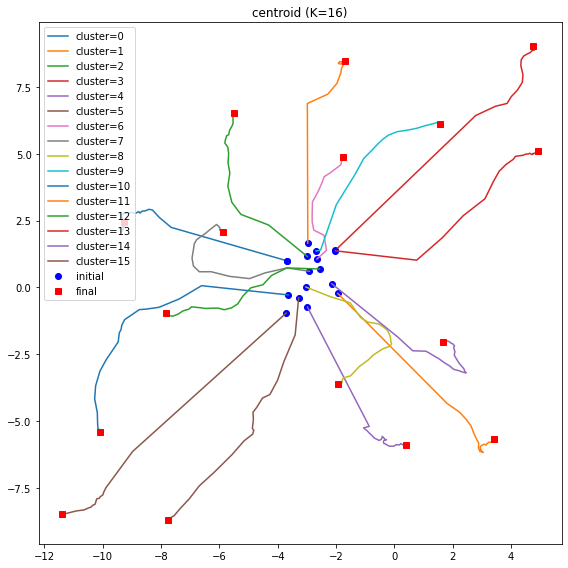

**************************************************
## [RESULT 13]
**************************************************


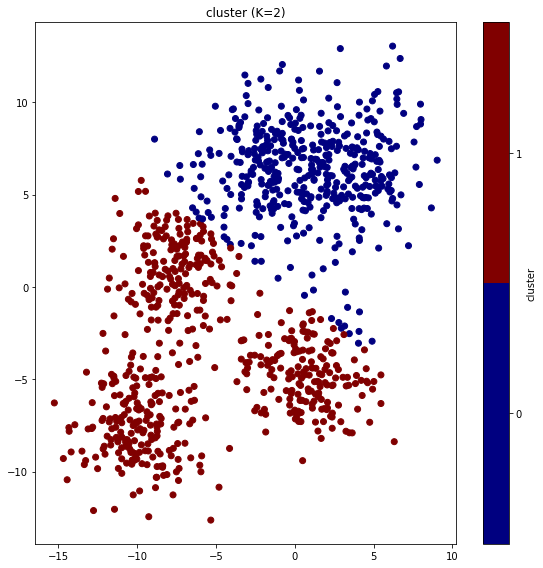

**************************************************
## [RESULT 14]
**************************************************


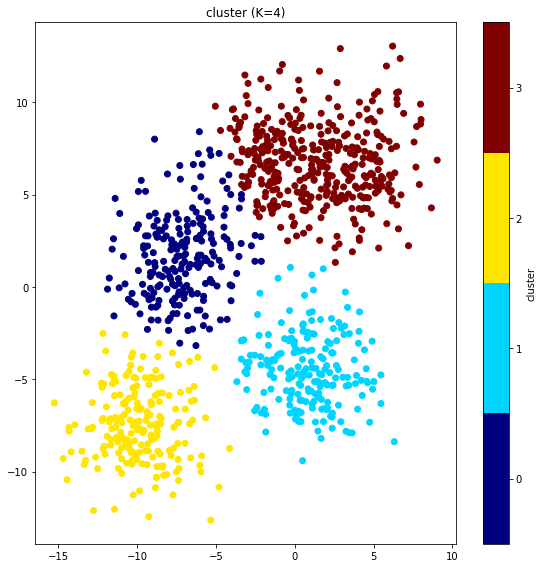

**************************************************
## [RESULT 15]
**************************************************


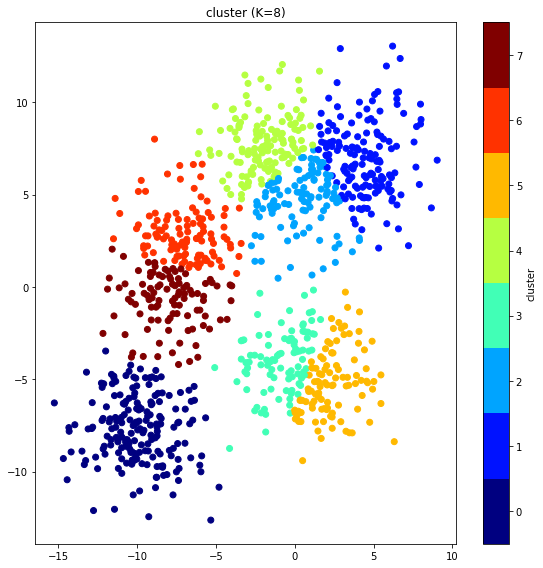

**************************************************
## [RESULT 16]
**************************************************


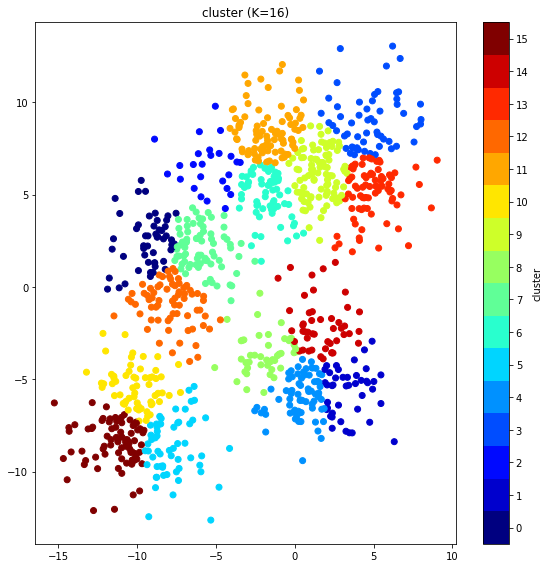

In [2071]:
number_result = 16

for i in range(number_result):
    title = '## [RESULT {:02d}]'.format(i+1)
    name_function = 'function_result_{:02d}()'.format(i+1)

    print('**************************************************')
    print(title)
    print('**************************************************')
    eval(name_function)